In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Read Bitcoin data from BTC-GBP file
bitcoin_data = pd.read_csv('BTC-GBP.csv')

# Read FTSE 100 historical price data from file
ftse100_data = pd.read_csv('FTSE100.csv')

In [3]:
bitcoin_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,10455.030273,10460.455078,9750.722656,10110.453125,10110.453125,7618596387
1,2018-01-02,10086.615234,11363.007813,9742.155273,11021.922852,11021.922852,12393585075
2,2018-01-03,11019.053711,11458.170898,10931.148438,11252.498047,11252.498047,12489377571
3,2018-01-04,11304.093750,11616.014648,10728.576172,11512.325195,11512.325195,16076162173
4,2018-01-05,11422.288086,13049.233398,11211.503906,12846.035156,12846.035156,17571417359
...,...,...,...,...,...,...,...
2186,2023-12-27,34319.226563,34321.847656,32808.109375,33411.425781,33411.425781,23594318803
2187,2023-12-28,33409.906250,34140.792969,33139.039063,33939.730469,33939.730469,19735110181
2188,2023-12-29,33959.531250,34214.468750,33215.449219,33474.332031,33474.332031,18054977889
2189,2023-12-30,33463.957031,33921.078125,32514.947266,33047.652344,33047.652344,20409782528


In [4]:
ftse100_data

,Date,Price,Open,High,Low,Vol.,Change %
0,29/12/2017,7687.77,"7,622.88","7,697.62","7,620.01",298.18M,0.85%
1,02/01/2018,7648.10,"7,687.77","7,691.34","7,624.14",594.07M,-0.52%
2,03/01/2018,7671.11,"7,648.10","7,689.86","7,640.53",589.34M,0.30%
3,04/01/2018,7695.88,"7,671.11","7,702.51","7,671.11",727.69M,0.32%
4,05/01/2018,7724.22,"7,695.88","7,727.73","7,689.81",655.71M,0.37%
...,...,...,...,...,...,...,...
1510,21/12/2023,7694.73,"7,715.68","7,715.68","7,668.41",562.95M,-0.27%
1511,22/12/2023,7697.51,"7,694.73","7,715.21","7,676.43",320.56M,0.04%
1512,27/12/2023,7724.95,"7,697.51","7,759.74","7,697.51",409.46M,0.36%
1513,28/12/2023,7722.74,"7,724.95","7,745.99","7,708.74",316.82M,-0.03%


In [5]:
import pandas as pd

# Convert 'Date' column to datetime type with custom format
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
ftse100_data['Date'] = pd.to_datetime(ftse100_data['Date'], format='%d/%m/%Y')

# Merge datasets on 'Date' with an outer join to include all dates
data = pd.merge(bitcoin_data[['Date', 'Adj Close']], ftse100_data[['Date', 'Price']], on='Date', how='outer')

# Sort by date
data = data.sort_values(by='Date')

# Forward fill missing values in FTSE100 data
data['Price'] = data['Price'].ffill()

# Rename columns
data = data.rename(columns={'Adj Close': 'BTC', 'Price': 'FTSE100'})

# Filter data for the specified date range
data = data[(data['Date'] >= '2018-01-01') & (data['Date'] <= '2023-12-31')]

# Save the merged data to a new file named 'data.csv'
data.to_csv('data.csv', index=False)

In [6]:
data

,Date,BTC,FTSE100
0,2018-01-01,10110.453125,7687.77
1,2018-01-02,11021.922852,7648.10
2,2018-01-03,11252.498047,7671.11
3,2018-01-04,11512.325195,7695.88
4,2018-01-05,12846.035156,7724.22
...,...,...,...
2186,2023-12-27,33411.425781,7724.95
2187,2023-12-28,33939.730469,7722.74
2188,2023-12-29,33474.332031,7733.24
2189,2023-12-30,33047.652344,7733.24


In [7]:
# Descriptive statistics
btc = data['BTC'].describe()
ftse100 = data['FTSE100'].describe()

# Print descriptive statistics
print("Bitcoin Descriptive Statistics:")
print(btc)
print("\nFTSE100 Descriptive Statistics:")
print(ftse100)

Bitcoin Descriptive Statistics:
count     2191.000000
mean     16688.638003
std      11804.778225
min       2571.105469
25%       6353.462890
50%      13935.910156
75%      24312.829101
max      49813.441406
Name: BTC, dtype: float64

FTSE100 Descriptive Statistics:
count    2191.000000
mean     7146.665126
std       540.614312
min      4993.890000
25%      6995.995000
50%      7281.190000
75%      7515.155000
max      8014.310000
Name: FTSE100, dtype: float64


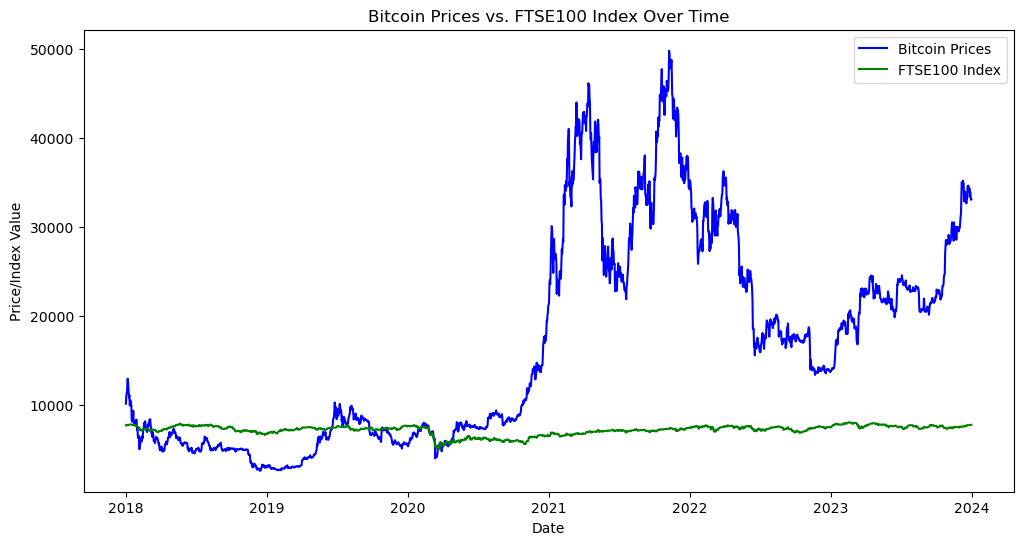

In [8]:
import matplotlib.pyplot as plt

# Line plots for Bitcoin prices and FTSE100 index
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['BTC'], label='Bitcoin Prices', color='blue')
plt.plot(data['Date'], data['FTSE100'], label='FTSE100 Index', color='green')
plt.title('Bitcoin Prices vs. FTSE100 Index Over Time')
plt.xlabel('Date')
plt.ylabel('Price/Index Value')
plt.legend()
plt.show()

In [9]:
# Calculate correlation coefficient
correlation_coefficient = data['BTC'].corr(data['FTSE100'])
print("Correlation Coefficient between Bitcoin Prices and FTSE100 Index:", correlation_coefficient)

Correlation Coefficient between Bitcoin Prices and FTSE100 Index: 0.16511210507315888


In [10]:
import numpy as np

# Calculate the logarithm of Bitcoin prices and FTSE100 index
data['log_BTC'] = np.log(data['BTC'])
data['log_FTSE100'] = np.log(data['FTSE100'])

# Descriptive statistics for log-transformed variables
log_btc = data['log_BTC'].describe()
log_ftse100 = data['log_FTSE100'].describe()

# Print descriptive statistics
print("Log Bitcoin Descriptive Statistics:")
print(log_btc)
print("\nLog FTSE100 Descriptive Statistics:")
print(log_ftse100)

Log Bitcoin Descriptive Statistics:
count    2191.000000
mean        9.436674
std         0.791474
min         7.852091
25%         8.756755
50%         9.542224
75%        10.098759
max        10.816040
Name: log_BTC, dtype: float64

Log FTSE100 Descriptive Statistics:
count    2191.000000
mean        8.871316
std         0.080129
min         8.515970
25%         8.853093
50%         8.893050
75%         8.924677
max         8.988984
Name: log_FTSE100, dtype: float64


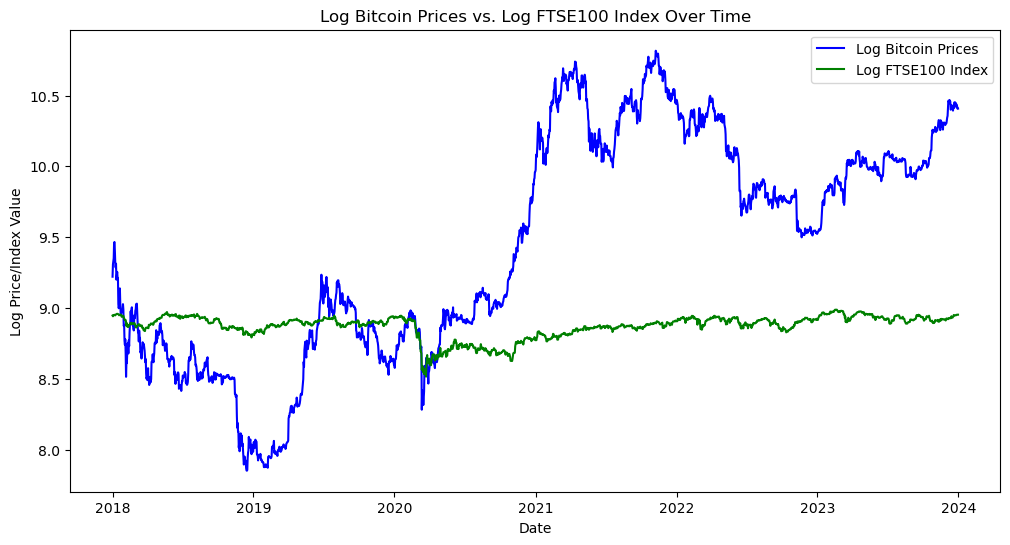

In [11]:
# Line plots for Bitcoin prices and FTSE100 index
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['log_BTC'], label='Log Bitcoin Prices', color='blue')
plt.plot(data['Date'], data['log_FTSE100'], label='Log FTSE100 Index', color='green')
plt.title('Log Bitcoin Prices vs. Log FTSE100 Index Over Time')
plt.xlabel('Date')
plt.ylabel('Log Price/Index Value')
plt.legend()
plt.show()

In [12]:
# Calculate correlation coefficient
correlation_coefficient = data['log_BTC'].corr(data['log_FTSE100'])
print("Correlation Coefficient between Log Bitcoin Prices and Log FTSE100 Index:", correlation_coefficient)

Correlation Coefficient between Log Bitcoin Prices and Log FTSE100 Index: 0.18715088686993894


In [13]:
import statsmodels.api as sm

# Add a constant term to the independent variable
X = sm.add_constant(data['log_BTC'])

# Specify the dependent variable
y = data['log_FTSE100']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_FTSE100   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     79.45
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.02e-18
Time:                        13:32:36   Log-Likelihood:                 2461.0
No. Observations:                2191   AIC:                            -4918.
Df Residuals:                    2189   BIC:                            -4907.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6925      0.020    431.833      0.0

In [14]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on FTSE100 index (log_FTSE100)
result_ftse100 = adfuller(data['log_FTSE100'])
print('\nADF Statistic for log_FTSE100:', result_ftse100[0])
print('p-value:', result_ftse100[1])
print('Critical Values:', result_ftse100[4])

# Perform ADF test on Bitcoin prices (log_BTC)
result_btc = adfuller(data['log_BTC'])
print('ADF Statistic for log_BTC:', result_btc[0])
print('p-value:', result_btc[1])
print('Critical Values:', result_btc[4])


ADF Statistic for log_FTSE100: -2.6186235445823023
p-value: 0.08920892301374672
Critical Values: {'1%': -3.433355979713365, '5%': -2.8628679395895342, '10%': -2.5674769282439556}
ADF Statistic for log_BTC: -0.7281469706219738
p-value: 0.8393235202135165
Critical Values: {'1%': -3.4333422250634027, '5%': -2.8628618662999394, '10%': -2.567473694616472}


In [15]:
import pandas as pd

# Calculate first differences for FTSE100 (dependent variable)
data['diff_FTSE100'] = data['log_FTSE100'].diff()

# Calculate first differences for BTC (independent variable)
data['diff_BTC'] = data['log_BTC'].diff()

# Drop NaN values resulting from differencing
data = data.dropna()

# Display the first few rows of the differenced data
print(data.head())

        Date           BTC  FTSE100   log_BTC  log_FTSE100  diff_FTSE100  \
1 2018-01-02  11021.922852  7648.10  9.307642     8.942213     -0.005174   
2 2018-01-03  11252.498047  7671.11  9.328345     8.945217      0.003004   
3 2018-01-04  11512.325195  7695.88  9.351173     8.948440      0.003224   
4 2018-01-05  12846.035156  7724.22  9.460790     8.952116      0.003676   
5 2018-01-06  12917.895508  7724.22  9.466369     8.952116      0.000000   

   diff_BTC  
1  0.086316  
2  0.020704  
3  0.022828  
4  0.109617  
5  0.005578  


In [16]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on differenced FTSE100
result_diff_FTSE100 = adfuller(data['diff_FTSE100'])
print('ADF Statistic for differenced FTSE100:', result_diff_FTSE100[0])
print('p-value:', result_diff_FTSE100[1])
print('Critical Values:', result_diff_FTSE100[4])

# Perform ADF test on differenced BTC
result_diff_BTC = adfuller(data['diff_BTC'])
print('\nADF Statistic for differenced BTC:', result_diff_BTC[0])
print('p-value:', result_diff_BTC[1])
print('Critical Values:', result_diff_BTC[4])

ADF Statistic for differenced FTSE100: -13.502183861089488
p-value: 2.9622550189994806e-25
Critical Values: {'1%': -3.433355979713365, '5%': -2.8628679395895342, '10%': -2.5674769282439556}

ADF Statistic for differenced BTC: -32.2573025679446
p-value: 0.0
Critical Values: {'1%': -3.4333422250634027, '5%': -2.8628618662999394, '10%': -2.567473694616472}


In [38]:
import statsmodels.api as sm

# Add a constant term to the independent variable (BTC) for the intercept
data['const'] = 1

# Define the dependent variable (first difference of log FTSE100 index)
y = data['diff_FTSE100']

# Define the independent variables (first difference of log BTC prices and the constant)
X = data[['diff_BTC', 'const']]

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           diff_FTSE100   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     66.25
Date:                Tue, 07 May 2024   Prob (F-statistic):           6.64e-16
Time:                        11:25:00   Log-Likelihood:                 7154.7
No. Observations:                2161   AIC:                        -1.431e+04
Df Residuals:                    2159   BIC:                        -1.429e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
diff_BTC       0.0433      0.005      8.139      0.0

In [17]:
import statsmodels.api as sm

# Define the ARIMA model parameters (p, d, q)
p = 1  # Autoregressive order
d = 1  # Differencing order (already differenced once)
q = 1  # Moving average order

# Fit the ARIMA model
model = sm.tsa.ARIMA(data['log_FTSE100'], order=(p, d, q))
results = model.fit()

# Print the summary of the model
print(results.summary())

C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            log_FTSE100   No. Observations:                 2190
Model:                 ARIMA(1, 1, 1)   Log Likelihood                7226.830
Date:                Mon, 06 May 2024   AIC                         -14447.660
Time:                        13:33:26   BIC                         -14430.586
Sample:                             0   HQIC                        -14441.419
                               - 2190                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0579      0.460     -0.126      0.900      -0.959       0.844
ma.L1          0.0251      0.462      0.054      0.957      -0.880       0.930
sigma2      7.933e-05   6.75e-07    117.496      0.0

In [26]:
import itertools
import statsmodels.api as sm

# Define a range for p and q
p_range = range(0, 4)
q_range = range(0, 4)

# Perform grid search
best_aic = float("inf")
best_params = (0, 0, 0)

for p, q in itertools.product(p_range, q_range):
    try:
        # Fit ARIMA model
        model = sm.tsa.ARIMA(data['log_FTSE100'], order=(p, 1, q))
        results = model.fit()

        # Check AIC
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = (p, 1, q)
    except:
        continue

print("Best AIC:", best_aic)
print("Best Parameters:", best_params)

C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

Best AIC: -14235.594175064825
Best Parameters: (1, 1, 0)


In [27]:
import statsmodels.api as sm

# Fit the ARIMA model
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 0  # Moving average order

# Create and fit the ARIMA model
model = sm.tsa.ARIMA(data['log_FTSE100'], order=(p, d, q))
results = model.fit()

# Print the summary of the model
print(results.summary())

C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            log_FTSE100   No. Observations:                 2161
Model:                 ARIMA(1, 1, 0)   Log Likelihood                7119.797
Date:                Mon, 06 May 2024   AIC                         -14235.594
Time:                        13:51:44   BIC                         -14224.238
Sample:                             0   HQIC                        -14231.441
                               - 2161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0335      0.011     -3.183      0.001      -0.054      -0.013
sigma2      8.026e-05   6.88e-07    116.617      0.000    7.89e-05    8.16e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [32]:
# Fit the ARIMA model with log differenced BTC as exogenous variable
model_with_exog = sm.tsa.ARIMA(data['log_FTSE100'], order=(p, d, q), exog=data['diff_BTC'])
results_with_exog = model_with_exog.fit()

# Print the summary of the model with exogenous variable
print(results_with_exog.summary())

C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sande\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            log_FTSE100   No. Observations:                 2161
Model:                 ARIMA(1, 1, 0)   Log Likelihood                7128.418
Date:                Tue, 07 May 2024   AIC                         -14250.836
Time:                        10:48:49   BIC                         -14233.803
Sample:                             0   HQIC                        -14244.606
                               - 2161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
diff_BTC       0.0156      0.002      9.085      0.000       0.012       0.019
ar.L1         -0.0296      0.011     -2.714      0.007      -0.051      -0.008
sigma2      7.962e-05   8.37e-07     95.112      0.0

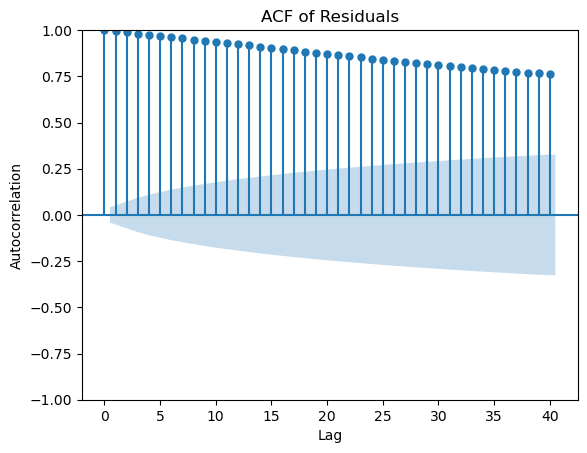

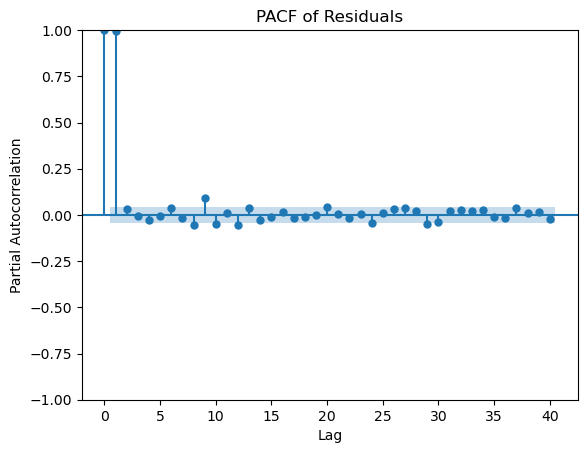

In [31]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Obtain the residuals from the ARIMA model
residuals = results.resid

# Plot ACF of residuals
plot_acf(residuals, lags=40, alpha=0.05)
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF of residuals
plot_pacf(residuals, lags=40, alpha=0.05)
plt.title('PACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [28]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Assuming residuals and exogenous variables are already defined
# Fit your model
model = sm.OLS(y, X)
results = model.fit()

# Obtain residuals
residuals = results.resid

# Perform White test for heteroskedasticity
white_test_results = het_white(residuals, X)
print("White Test Results:")
print(white_test_results)

White Test Results:
(207.91442690082312, 7.111412068882866e-46, 114.69922736315782, 4.253934403113874e-48)


In [30]:
# Assuming X already contains the first differences of log_BTC as diff_BTC

# Fit your model
model = sm.OLS(y, X)

# Get the results
results = model.fit()

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_FTSE100   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     79.45
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.02e-18
Time:                        14:24:47   Log-Likelihood:                 2461.0
No. Observations:                2191   AIC:                            -4918.
Df Residuals:                    2189   BIC:                            -4907.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6925      0.020    431.833      0.0

In [18]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Calculate the rolling standard deviation of FTSE100 returns
window_size = 30  # Adjust the window size as needed
data.loc[:, 'volatility_FTSE100'] = data['log_FTSE100'].rolling(window=window_size).std()

C:\Users\sande\AppData\Local\Temp\ipykernel_22912\2255551748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'volatility_FTSE100'] = data['log_FTSE100'].rolling(window=window_size).std()


In [20]:
import pandas as pd
import numpy as np
from arch import arch_model

# Define the independent variable (BTC) and dependent variable (volatility of FTSE100)
btc = data['log_BTC']
volatility_ftse100 = data['volatility_FTSE100']

# Drop rows with NaN or infinite values in 'volatility_FTSE100'
data = data.dropna(subset=['volatility_FTSE100'])
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['volatility_FTSE100'])

# Rescale the dependent variable
rescaled_volatility_ftse100 = 100 * data['volatility_FTSE100']

# Fit a GARCH(1,1) model with rescaled dependent variable
model = arch_model(rescaled_volatility_ftse100, x=btc, vol='Garch', p=1, q=1, rescale=100)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7878623928609910.0
Iteration:      2,   Func. Count:     18,   Neg. LLF: 14068771.965621747
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1385.1859996404162
Iteration:      4,   Func. Count:     30,   Neg. LLF: 2000.7658100840688
Iteration:      5,   Func. Count:     36,   Neg. LLF: 108093.19499085138
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1128.3927900096314
Iteration:      7,   Func. Count:     48,   Neg. LLF: 27938.92846995654
Iteration:      8,   Func. Count:     54,   Neg. LLF: 29133.378228509326
Iteration:      9,   Func. Count:     60,   Neg. LLF: 16049.549699451576
Iteration:     10,   Func. Count:     66,   Neg. LLF: 1751.9181802088199
Iteration:     11,   Func. Count:     72,   Neg. LLF: 921.9072597995853
Iteration:     12,   Func. Count:     77,   Neg. LLF: 1200.4364119027161
Iteration:     13,   Func. Count:     83,   Neg. LLF: 973.8167704805942
Iteration:     14,   Func. Count:     90,   Neg. LLF: 

In [21]:
import pandas as pd
import numpy as np
from arch import arch_model

# Define the dependent variable (volatility of FTSE100)
volatility_ftse100 = data['volatility_FTSE100']

# Define the independent variable (dummy variable for BTC shocks)
btc_shocks = (data['log_BTC'].diff() > 0).astype(int)  # Dummy variable: 1 for positive shocks, 0 otherwise

# Drop rows with NaN values
data.dropna(subset=['volatility_FTSE100'], inplace=True)
btc_shocks = btc_shocks[data.index.isin(volatility_ftse100.index)]  # Align indices

# Fit a GARCH(1,1) model with the dummy variable
model = arch_model(volatility_ftse100, x=btc_shocks, vol='Garch', p=1, q=1)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: -8046.76293064397
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -8046.7629662895
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     volatility_FTSE100   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8046.76
Distribution:                  Normal   AIC:                          -16085.5
Method:            Maximum Likelihood   BIC:                          -16062.8
                                        No. Observations:                 2161
Date:                Mon, May 06 2024   Df Residuals:                     2160
Time:                        13:35:53   Df Model:                            1
             

C:\Users\sande\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001635. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\sande\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [22]:
import pandas as pd
import numpy as np
from arch import arch_model

# Rescale the dependent variable
volatility_ftse100_rescaled = 100 * volatility_ftse100

# Fit a GARCH(1,1) model with rescaled data
model_rescaled = arch_model(volatility_ftse100_rescaled, x=btc, vol='Garch', p=1, q=1, rescale=False)
results_rescaled = model_rescaled.fit()

# Print the summary of the model with rescaled data
print(results_rescaled.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7878623928609910.0
Iteration:      2,   Func. Count:     18,   Neg. LLF: 14068771.965621747
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1385.1859996404162
Iteration:      4,   Func. Count:     30,   Neg. LLF: 2000.7658100840688
Iteration:      5,   Func. Count:     36,   Neg. LLF: 108093.19499085138
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1128.3927900096314
Iteration:      7,   Func. Count:     48,   Neg. LLF: 27938.92846995654
Iteration:      8,   Func. Count:     54,   Neg. LLF: 29133.378228509326
Iteration:      9,   Func. Count:     60,   Neg. LLF: 16049.549699451576
Iteration:     10,   Func. Count:     66,   Neg. LLF: 1751.9181802088199
Iteration:     11,   Func. Count:     72,   Neg. LLF: 921.9072597995853
Iteration:     12,   Func. Count:     77,   Neg. LLF: 1200.4364119027161
Iteration:     13,   Func. Count:     83,   Neg. LLF: 973.8167704805942
Iteration:     14,   Func. Count:     90,   Neg. LLF: 

In [58]:
# Calculate the mean standard deviation of BTC prices
btc_mean_std = data['log_BTC'].std()

# Use the mean standard deviation as the threshold for identifying shocks
threshold = btc_mean_std

# Define a function to identify shocks based on the threshold
def identify_shocks(btc_price):
    if btc_price > threshold:
        return 1  # Shock
    else:
        return 0  # No shock

# Apply the function to the BTC prices to identify shocks
data['BTC_Shock'] = data['log_BTC'].apply(identify_shocks)

# Display the first few rows of the data
print(data.head())

         Date          BTC  FTSE100   log_BTC  log_FTSE100  diff_FTSE100  \
30 2018-01-31  7199.478516  7533.55  8.881764     8.927122     -0.007199   
31 2018-02-01  6428.699707  7490.39  8.768528     8.921376     -0.005746   
32 2018-02-02  6254.072266  7443.43  8.740988     8.915087     -0.006289   
33 2018-02-03  6497.811523  7443.43  8.779221     8.915087      0.000000   
34 2018-02-04  5866.059570  7443.43  8.676938     8.915087      0.000000   

    diff_BTC  volatility_FTSE100  BTC_Shock  lagged_BTC  const  
30  0.008262            0.007588          1         NaN      1  
31 -0.113236            0.009076          1    8.881764      1  
32 -0.027539            0.010948          1    8.768528      1  
33  0.038233            0.012459          1    8.740988      1  
34 -0.102282            0.013668          1    8.779221      1  


In [59]:

# Fit a GARCH(1,1) model including the dummy variable
model = arch_model(y=volatility_ftse100, x=btc, mean='Constant', vol='GARCH', p=1, q=1, o=1)

# Estimate the model coefficients
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -8134.615179392514
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -8134.615201585705
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:     volatility_FTSE100   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                8134.62
Distribution:                  Normal   AIC:                          -16259.2
Method:            Maximum Likelihood   BIC:                          -16230.8
                                        No. Observations:                 2161
Date:                Wed, May 08 2024   Df Residuals:                     2160
Time:                        09:33:11   Df Model:                            1
          

C:\Users\sande\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001635. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\sande\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [60]:
import pandas as pd
import arch

# Assuming 'log_FTSE100' contains the log returns of the FTSE100 index
returns = data['log_FTSE100']

# Fit GARCH(1,1) model
garch_model = arch.arch_model(returns, vol='Garch', p=1, q=1)
garch_results = garch_model.fit()

# Print summary of the model
print(garch_results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2412891841.8843613
Iteration:      2,   Func. Count:     20,   Neg. LLF: 36588128.75747279
Iteration:      3,   Func. Count:     31,   Neg. LLF: 4.2194966468808455e+20
Iteration:      4,   Func. Count:     44,   Neg. LLF: 3.146633853579103e+20
Iteration:      5,   Func. Count:     58,   Neg. LLF: -3796.4277561502354
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3796.427784121296
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            log_FTSE100   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3796.43
Distribution:                  Normal   AIC:                          -7584.86
Method:            Maximu

C:\Users\sande\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.006419. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [61]:
import pandas as pd
import arch

# Assuming 'log_FTSE100' contains the log returns of the FTSE100 index
returns = data['log_FTSE100']

# Define the exogenous variable (Bitcoin shock)
exog = data['BTC_Shock']

# Fit GARCH(1,1) model with Bitcoin shock dummy
garch_model = arch.arch_model(returns, vol='Garch', p=1, q=1, o=1, x=exog)
garch_results = garch_model.fit(disp='off')

# Print summary of the model
print(garch_results.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:            log_FTSE100   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                3878.80
Distribution:                  Normal   AIC:                          -7747.60
Method:            Maximum Likelihood   BIC:                          -7719.21
                                        No. Observations:                 2161
Date:                Wed, May 08 2024   Df Residuals:                     2160
Time:                        09:33:21   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             8.9030  1.973e-03   4513.528      0.000 [  8.899,  8.90

C:\Users\sande\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.006419. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
